# Import the libraries

In [90]:
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt

# Load the dataset

In [91]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'
# load the dataset
dataset = read_csv(url, header=None)


# EDA

In [92]:
# summarize shape
dataset.shape

(1372, 5)

In [93]:
dataset.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [94]:
print(dataset.describe())

                 0            1            2            3            4
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [96]:
dataset.isna()

,0,1,2,3,4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False


# Histogram and Correlation matrix

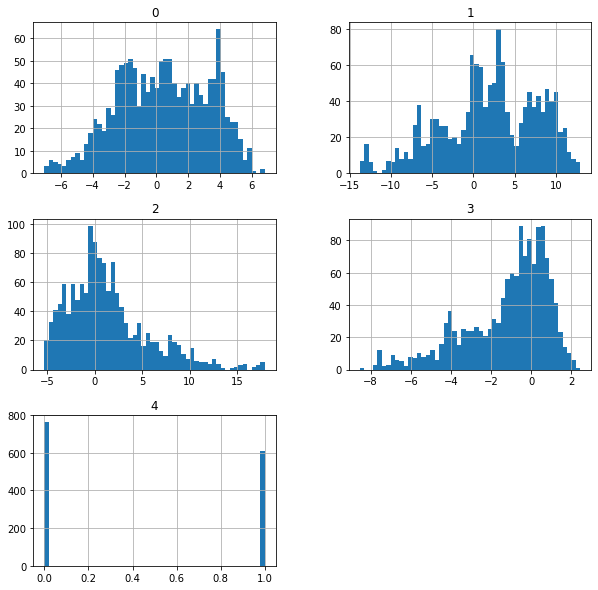

In [97]:
# Plot the histograms of all variables
dataset.hist(figsize=(10,10), bins=50)
plt.show()

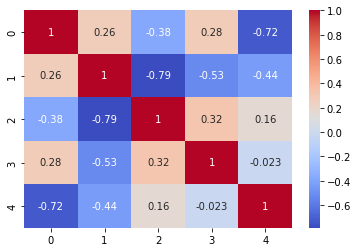

In [98]:
# Plot the correlation matrix as heatmap
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [99]:
for col in dataset.columns:
    print(col)
    print('-------------------------')
    print(dataset[col].value_counts()/np.float(len(dataset)))
    print()

0
-------------------------
 0.5706    0.003644
 0.5195    0.002915
 0.3292    0.002915
 0.3798    0.002915
-2.6479    0.002187
             ...   
 0.1848    0.000729
 4.5707    0.000729
 2.9742    0.000729
 1.1472    0.000729
-2.5419    0.000729
Name: 0, Length: 1338, dtype: float64

1
-------------------------
-4.45520    0.004373
-3.26330    0.003644
 0.70980    0.002915
-3.79710    0.002915
-0.02480    0.002915
              ...   
 8.81100    0.000729
 6.40230    0.000729
 7.27970    0.000729
 2.10860    0.000729
-0.65804    0.000729
Name: 1, Length: 1256, dtype: float64

2
-------------------------
 1.2421    0.003644
 4.5718    0.003644
 3.0895    0.003644
 0.7572    0.002915
-3.7044    0.002187
             ...   
-2.0439    0.000729
 1.0588    0.000729
-0.7843    0.000729
-2.9024    0.000729
 2.6842    0.000729
Name: 2, Length: 1270, dtype: float64

3
-------------------------
-0.29570    0.003644
-0.98880    0.003644
-0.44440    0.002915
 0.36119    0.002915
-0.23751    0.00

C:\Users\abira\AppData\Local\Temp\ipykernel_11116\3251863220.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(dataset[col].value_counts()/np.float(len(dataset)))
C:\Users\abira\AppData\Local\Temp\ipykernel_11116\3251863220.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(dataset[col].value_counts()/np.float(len(dataset))

# Box plot

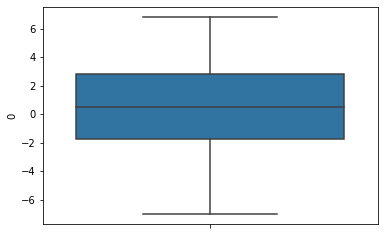

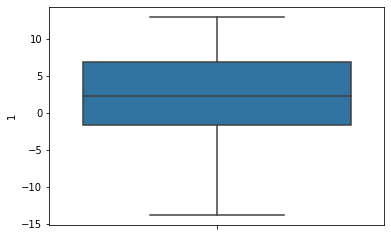

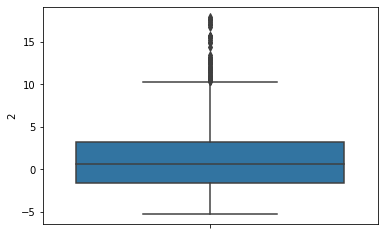

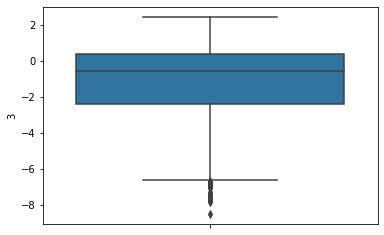

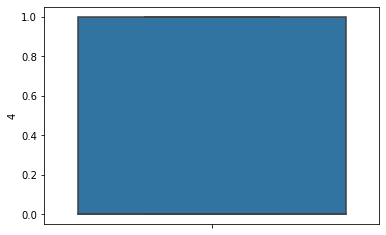

In [100]:
df1 = dataset.select_dtypes([np.int64, np.float64])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.boxplot(y = col, data = df1)

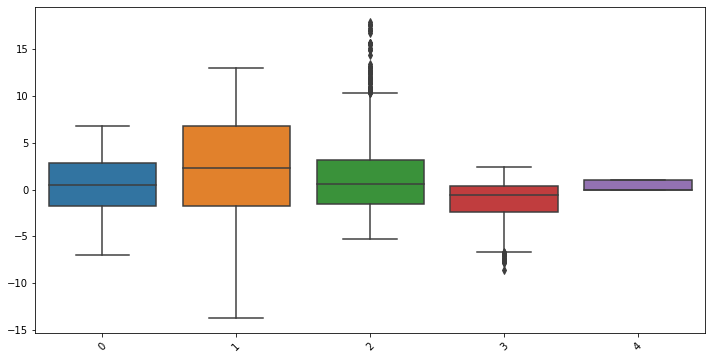

In [101]:
# Select only numerical columns
df1 = dataset.select_dtypes([np.int64, np.float64])

# box plot for multiple variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1)
plt.xticks(rotation=45)
plt.show()


# Split into input and output columns

In [102]:
X, y = dataset.values[:, :-1], dataset.values[:, -1]

# Split into train and test datasets


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Determing the number of input features 

In [104]:
n_features = X.shape[1]

# Implementing Activation Function 

In [105]:
#definig the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=2, validation_data=(X_test,y_test))
# predict test set
yhat = model.predict(X_test) > 0.5
# evaluate predictions
score = accuracy_score(y_test, yhat)


Epoch 1/15
35/35 - 3s - loss: 3.1509 - accuracy: 0.4959 - val_loss: 3.2949 - val_accuracy: 0.4364 - 3s/epoch - 74ms/step
Epoch 2/15
35/35 - 0s - loss: 2.6996 - accuracy: 0.5032 - val_loss: 2.7852 - val_accuracy: 0.4218 - 220ms/epoch - 6ms/step
Epoch 3/15
35/35 - 0s - loss: 2.2487 - accuracy: 0.4731 - val_loss: 2.2598 - val_accuracy: 0.3927 - 230ms/epoch - 7ms/step
Epoch 4/15
35/35 - 0s - loss: 1.8010 - accuracy: 0.4640 - val_loss: 1.7671 - val_accuracy: 0.4036 - 210ms/epoch - 6ms/step
Epoch 5/15
35/35 - 0s - loss: 1.4036 - accuracy: 0.4968 - val_loss: 1.3428 - val_accuracy: 0.4327 - 213ms/epoch - 6ms/step
Epoch 6/15
35/35 - 0s - loss: 1.0825 - accuracy: 0.5533 - val_loss: 1.0500 - val_accuracy: 0.5818 - 210ms/epoch - 6ms/step
Epoch 7/15
35/35 - 0s - loss: 0.8586 - accuracy: 0.6263 - val_loss: 0.8508 - val_accuracy: 0.6582 - 223ms/epoch - 6ms/step
Epoch 8/15
35/35 - 0s - loss: 0.6986 - accuracy: 0.6946 - val_loss: 0.7031 - val_accuracy: 0.6945 - 210ms/epoch - 6ms/step
Epoch 9/15
35/35 -

In [106]:
print('Accuracy for the model: %.3f' % score)

Accuracy for the model: 0.884


In [107]:
from sklearn.metrics import classification_report
classification_report(y_test, yhat, labels=[0,1])

'              precision    recall  f1-score   support\n\n           0       0.85      0.97      0.91       160\n           1       0.95      0.77      0.85       115\n\n    accuracy                           0.88       275\n   macro avg       0.90      0.87      0.88       275\nweighted avg       0.89      0.88      0.88       275\n'

# Train Accuracy vs Test  Accuracy

In [108]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy of the model: %.3f,\n Test Accuracy of the model: %.3f' % (train_acc, test_acc))

Train Accuracy of the model: 0.904,
 Test Accuracy of the model: 0.884


# Visulization 

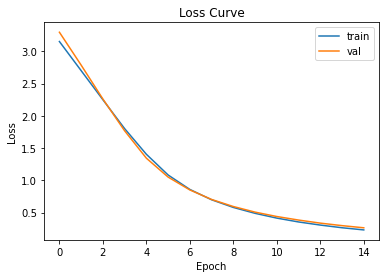

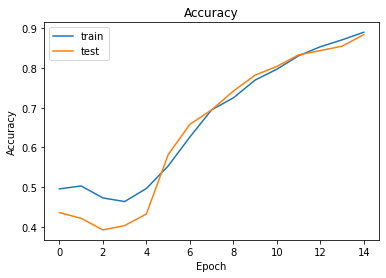

In [109]:
# plot learning curves
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [110]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense



In [111]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=2)>0.5
# predict crisp classes for test set
yhat_classes = model.predict(X_test, verbose=0)>0.5
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

9/9 - 0s - 79ms/epoch - 9ms/step


# Accuracy , percision,recall and f1 score



In [112]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy of the model: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision for the model: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall for the model: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score for the model: %f' % f1)

Accuracy of the model: 0.883636
Precision for the model: 0.946237
Recall for the model: 0.765217
F1 score for the model: 0.846154


In [113]:
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.754259
ROC AUC: 0.866984
[[155   5]
 [ 27  88]]


# Implementing Activation Function


In [114]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=2, validation_data=(X_test,y_test))
# predict test set
yhat = model.predict(X_test) > 0.5
# evaluate predictions
score = accuracy_score(y_test, yhat)


Epoch 1/25
35/35 - 3s - loss: 5.4271 - accuracy: 0.3610 - val_loss: 5.0438 - val_accuracy: 0.3455 - 3s/epoch - 85ms/step
Epoch 2/25
35/35 - 0s - loss: 4.5583 - accuracy: 0.3555 - val_loss: 4.1873 - val_accuracy: 0.3418 - 238ms/epoch - 7ms/step
Epoch 3/25
35/35 - 0s - loss: 3.7420 - accuracy: 0.3409 - val_loss: 3.3948 - val_accuracy: 0.3236 - 209ms/epoch - 6ms/step
Epoch 4/25
35/35 - 0s - loss: 2.9782 - accuracy: 0.3045 - val_loss: 2.6368 - val_accuracy: 0.2909 - 220ms/epoch - 6ms/step
Epoch 5/25
35/35 - 0s - loss: 2.2726 - accuracy: 0.2689 - val_loss: 1.9730 - val_accuracy: 0.2727 - 210ms/epoch - 6ms/step
Epoch 6/25
35/35 - 0s - loss: 1.6540 - accuracy: 0.2853 - val_loss: 1.4322 - val_accuracy: 0.2982 - 225ms/epoch - 6ms/step
Epoch 7/25
35/35 - 0s - loss: 1.1927 - accuracy: 0.3345 - val_loss: 1.0582 - val_accuracy: 0.3164 - 210ms/epoch - 6ms/step
Epoch 8/25
35/35 - 0s - loss: 0.9072 - accuracy: 0.4148 - val_loss: 0.8437 - val_accuracy: 0.4618 - 200ms/epoch - 6ms/step
Epoch 9/25
35/35 -

In [115]:
print('Accuracy of the model: %.3f' % score)

Accuracy of the model: 0.978


In [116]:
from sklearn.metrics import classification_report
classification_report(y_test, yhat, labels=[0,1])

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98       160\n           1       0.98      0.97      0.97       115\n\n    accuracy                           0.98       275\n   macro avg       0.98      0.98      0.98       275\nweighted avg       0.98      0.98      0.98       275\n'

In [117]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.976, Test: 0.978


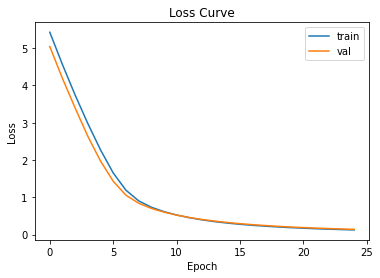

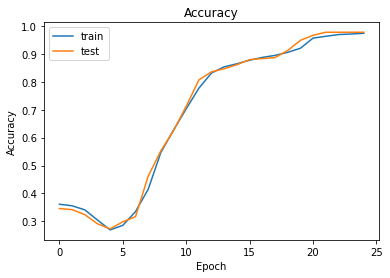

In [118]:
# plot learning curves
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Evaluvation metrics

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [120]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=2)>0.5
# predict crisp classes for test set
yhat_classes = model.predict(X_test, verbose=0)>0.5
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

9/9 - 0s - 68ms/epoch - 8ms/step


In [121]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy of the model: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision for the model: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall for the model: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score for the model: %f' % f1)

Accuracy of the model: 0.978182
Precision for the model: 0.982301
Recall for the model: 0.965217
F1 score for the model: 0.973684


In [122]:
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.955053
ROC AUC: 0.976359
[[158   2]
 [  4 111]]
